# Ch6

In [1]:
import numpy as np
from icecream import ic

import ch4
import ch6

%load_ext autoreload
%autoreload 2

## 6.1 

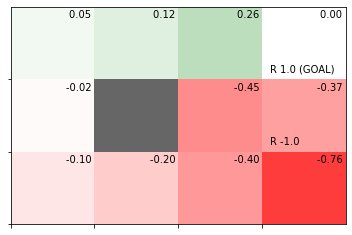

In [2]:
# .3
env = ch4.GridWorld()
agent = ch6.TdAgent(seed=4)

episodes = 1_000

for _ in range(episodes):
    # init
    state = env.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        # 毎回呼ぶ
        agent.eval(state, reward, next_state, done)
        if done:
            break
        state = next_state

env.render_v(agent.V)

## 6.2

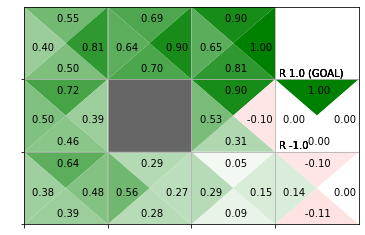

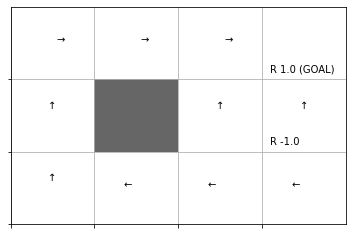

In [3]:
def experiment_sarsa(cls_sarsa, seed=0):
    env = ch4.GridWorld()
    agent = cls_sarsa(seed=seed)

    episodes = 10_000

    for _ in range(episodes):
        # init
        state = env.reset()
        agent.reset()

        while True:
            action = agent.get_action(state)
            next_state, reward, done = env.step(action)

            agent.update(state, action, reward, done)
            if done:
                agent.update(state, None, None, None)
                break
            state = next_state

    env.render_q(agent.Q)


experiment_sarsa(ch6.SarsaAgent, seed=5)

## 6.3

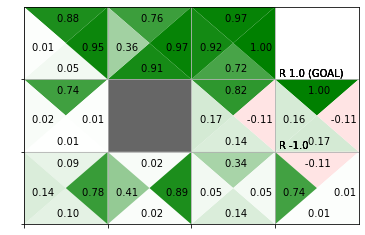

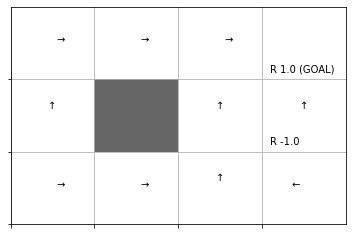

In [4]:
experiment_sarsa(ch6.SarsaOffPolicyAgent, seed=6)

MEMO: あまりうまくいっていない？

# 6.4

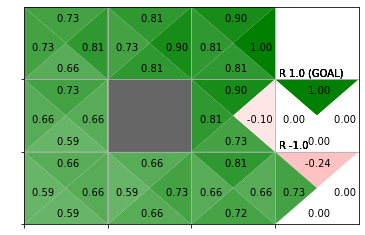

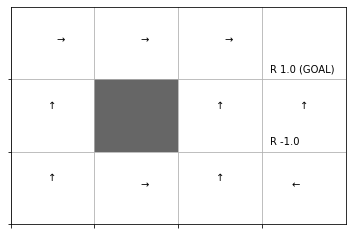

In [5]:
env = ch4.GridWorld()
agent = ch6.QLearningAgent(seed=9)


episodes = 10_000

for _ in range(episodes):
    # init
    state = env.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        agent.update(state, action, reward, next_state, done)
        if done:
            break
        state = next_state

env.render_q(agent.Q)